In [24]:
#!pip install -r requirements-pcamad.txt

In [25]:
import pandas as pd

from src.pca_mad import PCAMAD
from sklearn.metrics import roc_auc_score

X.shape (237, 2) y.shape (237,)


<AxesSubplot:xlabel='0', ylabel='1'>

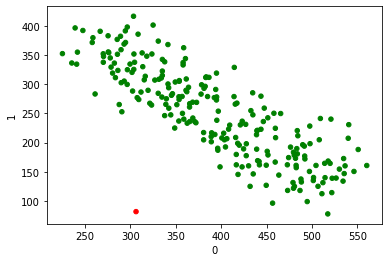

In [26]:
datasetname = 'testdata'
folderpath = f"./datasets/{datasetname}"
filepath = f"{folderpath}/{datasetname}.csv"
data = pd.read_csv(filepath, header=None).values
Xdata = data[:,:-1]
X = data[:, :2]
y = data[:, -1]

print(f"X.shape {X.shape} y.shape {y.shape}")
cols = ['r' if lbl == 1. else 'g' for lbl in y]
df_X = pd.DataFrame(X)
df_X.plot.scatter(x=0, y=1, c=cols)

In [27]:
metrics = {}

pcamad = PCAMAD()
pcamad.fit(Xdata)

y_preds = pcamad.predict(Xdata) # unsupervised -> train=test
metrics[pcamad._name] = roc_auc_score(y, y_preds)

for k,v in metrics.items():
    print(f"{k} - rocauc: {v} ({datasetname})") 

PCA-MAD++ - rocauc: 1.0 (testdata)
